## following code is helping us to remove some predefine skill from our draft skill set. secondly, it might help us to add some skills that have high frequency to extend the draft skill. finally, it helps us to find out which one is most popular skill
### handling the job description without job title

In [1]:
import re
#import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopWord = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
ps = PorterStemmer()
infile = open('all_no_title.csv', 'r', encoding='utf-8')
stemmedDoc = []
for line in infile:
    #put every character into lower case
    line = line.lower()
     # only keeing the word characters ,which means also removing the punctctation and non-word characters
    line = re.sub( r'[^a-z\n ]', ' ', line )
    #remove stop word
    word = word_tokenize(line)
    sentenceWithoutStopWord = [w for w in word if not w in stopWord]
    sentenceStemmed = []
    for word in sentenceWithoutStopWord:   
        word = ps.stem(word)
        if len(word) >= 3:
            sentenceStemmed.append(word)
    sentenceStemmed = (" ").join(sentenceStemmed)
    stemmedDoc.append(sentenceStemmed)
    
#print(stemmedDoc)
#freq = nltk.FreqDist(stemmedDoc)
#for key,val in freq.items():
    #print(str(key) + ':' + str(val))
#freq.plot(20, cumulative=False)
    
infile.close()
print("done")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hecheng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hecheng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


done


### put all the job description in to one string

In [2]:
string =" "
string =' '.join(stemmedDoc)

In [3]:
len(string)

34269626

In [4]:
#string

### convert this whole string, into n=1 gram, n=2 gram, n =3 gram, this one will generate list
### after that convert into set to remove some dupliate

In [5]:
from nltk.util import ngrams
def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

n1gram=get_ngrams(string, 1 )
n2gram=get_ngrams(string, 2 )
n3gram=get_ngrams(string, 3 )

In [6]:
n1=set(n1gram)
n2=set(n2gram)
n3=set(n3gram)

In [7]:
### next move to draftofskill, the document is handling convert the skill in difference word length

### taking the difference word length draft skill we generate, and checking when n=1 gram in job descirption, the term fruency in our word length 1 skill, only keeping the one that is bigger than 0 

In [8]:
import pandas as pd 
df = pd.read_csv("skillset/ste_len_1.csv")
df2 = pd.read_csv("skillset/ste_len_2.csv")
df3 = pd.read_csv("skillset/ste_len_3.csv")
d1=df["0"].values.tolist()
d2=df2["0"].values.tolist()
d3=df3["0"].values.tolist()

### generating the synonyms, for the skill, which word length is one

In [9]:
from nltk.corpus import wordnet
synonyms1=[]

for i in d1:
    for syn in wordnet.synsets(i):
        for l in syn.lemmas():
            synonyms1.append(l.name())
            


In [10]:
for i in range(0,len(synonyms1)):
    synonyms1[i]=synonyms1[i].lower()
d1=set(synonyms1)

In [11]:
SKILL1={"1"} #create the set 

count1=0;
for i in d1:  # for each item in our word length =1 job skill
    if i in n1:  # chekcing whether is it inside the n=1 gram job description
        count1+=1 # if yes, adding one 
        SKILL1.add(i)   # store this value into the set
    #print(str(i) +"............ value is "+ str(count1))
    count1=0
SKILL1.remove("1")

In [12]:
SKILL2={"1"}
count2=0;
for i in d2:   # for each item in our word length =2 job skill
    if i in n2:   # chekcing whether is it inside the n=2 gram job description
        count2+=1
        SKILL2.add(i)    # if yes, store this value into the set
    #print(str(i) +"............ value is "+ str(count2))
    count2=0
SKILL2.remove("1")

In [13]:
SKILL3={"1"}
count3=0;
for i in d3:
    if i in n3:
        count3+=1
        SKILL3.add(i)
    #print(str(i) +"............ value is "+ str(count3))
    count3=0
SKILL3.remove("1")

In [14]:
#len(SKILL)=106

In [15]:
## this is the list of skill matching in our draft skill set
SKILL={"0"}
for i in SKILL1:
    SKILL.add(i)
    
for i in SKILL2:
    SKILL.add(i)
    
for i in SKILL3:
    SKILL.add(i)

SKILL.remove("0") 

In [16]:
len(SKILL)

111

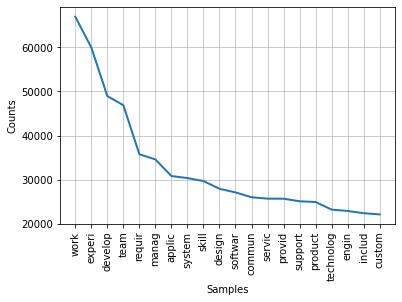

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
## we plot the below graph, in order to check which word length one skill might worth to add it in our skill 
freq = nltk.FreqDist(n1gram)
#for key,val in freq.items():
    #print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

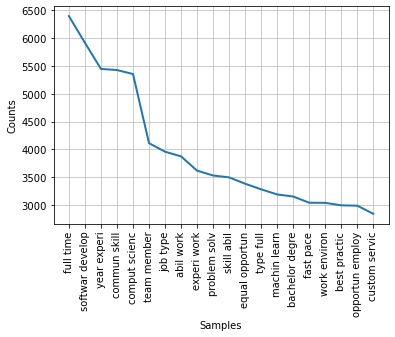

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
## we plot the below graph, in order to check which word length is 2 skill might worth to add it in our skill 
freq = nltk.FreqDist(n2gram)
#for key,val in freq.items():
    #print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

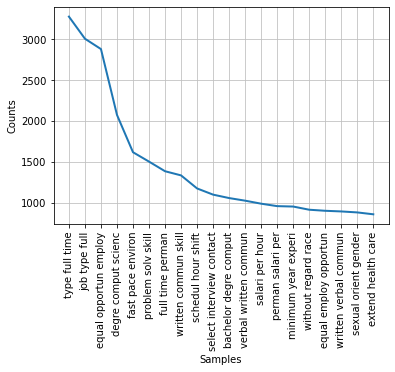

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
## we plot the below graph, in order to check which word length is 3, skill might worth to add it in our skill 
freq = nltk.FreqDist(n3gram)
#for key,val in freq.items():
    #print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

In [20]:
# the finalize skill based on word length 1 to 3 skill
#SKILL

In [21]:
# following the code is help to vislize the above three graph, checking which skill is worth to add to our skill 
#df = pd.DataFrame (n1gram, columns = ['word_length_one_skill'])
#df.value_counts(sort=True).head(60)

In [22]:
#df2 = pd.DataFrame (n2gram, columns = ['word_length_second_skill'])
#df2.value_counts(sort=True)

In [23]:
#df3 = pd.DataFrame (n3gram, columns = ['word_length_3_skill'])
#df3.value_counts(sort=True)

In [24]:
# transfering above graph information to the code in order prepare for the next step
frequencies = {}
for item in n1gram:
    if item in frequencies:
        frequencies[item] += 1
    else:
        frequencies[item] = 1

frequencies1 = {}
for item in n2gram:
    if item in frequencies1:
        frequencies1[item] += 1
    else:
        frequencies1[item] = 1
        
frequencies2 = {}
for item in n3gram:
    if item in frequencies2:
        frequencies2[item] += 1
    else:
        frequencies2[item] = 1


In [25]:
q1=[]
q2=[]

In [26]:
# skill1, skill2 , skill3 is the finlaize version of our skill set. following code: searching the frequiency occur in the n gram, and store the
# the result from store it in our skill set, to define which skill is more popular 
for i in SKILL1:
    q1.append(i)
    q2.append(frequencies[i])
    
for i in SKILL2:
    q1.append(i)
    q2.append(frequencies1[i])
    
for i in SKILL3:
    q1.append(i)
    q2.append(frequencies2[i])

In [27]:
top = pd.DataFrame()
top['word_length_1-3_skill']=q1
top['count']=q2
a=top.sort_values(by=['count'],ascending=False).head(30)

In [28]:
a

,word_length_1-3_skill,count
6,product,24980
50,market,12977
70,excel,12235
13,report,10892
41,organ,9695
46,account,8823
52,sale,5040
48,write,4932
82,problem solv,3529
3,python,3429


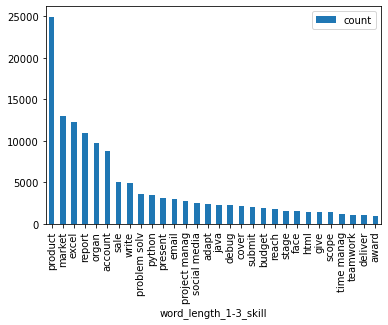

In [29]:
ax = a.plot.bar(x='word_length_1-3_skill', y='count')